In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Read the data for the last three years. Beware that master_adv_id is not part of the set and must be queried.
df=pd.read_csv("../data/last_three_years.csv")

In [3]:
# Get a description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
csr_year,892438.0,2.016805e+03,0.707051,2016.0,2016.00,2017.00,2017.00,2018.00
csr_month,892438.0,6.035496e+00,3.531958,1.0,3.00,6.00,9.00,12.00
idcampaign_master,892438.0,1.799198e+06,560952.691773,820.0,1597675.00,1979310.00,2206470.00,2522502.00
idcampaign,892438.0,2.237547e+06,163107.688497,167394.0,2105700.00,2241402.50,2375570.00,2523052.00
idadvertiser,892438.0,1.636473e+05,41763.665278,137.0,154989.00,179454.00,188050.00,234488.00
idbusinesscategory,892438.0,1.718498e+01,7.761598,1.0,13.00,21.00,22.00,32.00
idbusinesssubcategory,892438.0,1.744083e+03,778.167065,0.0,1300.00,2110.00,2224.00,3301.00
idoffer,892438.0,7.207159e+02,842.917016,1.0,1.00,1.00,1674.00,2029.00
stop_request,646515.0,2.021763e-02,0.140744,0.0,0.00,0.00,0.00,1.00
campaign_budget,892438.0,1.230596e+03,2612.119352,10.0,300.00,800.00,1500.00,350000.00


In [4]:
# Check for missing values
df.isna().sum()

csr_year                      0
csr_month                     0
idcampaign_master             0
idcampaign                    0
idadvertiser                  0
advertiser_name               0
advertiser_city               0
advertiser_state              0
advertiser_zipcode            0
idbusinesscategory            0
business_category             0
idbusinesssubcategory         0
business_subcategory         97
idoffer                       0
product                       0
stop_request             245923
adv_change_type               0
campaign_budget               0
spend                         0
clicks                        0
impressions                   0
calls                         0
qualified_calls               0
emails                        0
cvt                           0
qualified_web_events          0
businessuser             245923
system                   245923
advtrans                      0
dtype: int64

In [5]:
# Get a list of available columns
df.columns

Index(['csr_year', 'csr_month', 'idcampaign_master', 'idcampaign',
       'idadvertiser', 'advertiser_name', 'advertiser_city',
       'advertiser_state', 'advertiser_zipcode', 'idbusinesscategory',
       'business_category', 'idbusinesssubcategory', 'business_subcategory',
       'idoffer', 'product', 'stop_request', 'adv_change_type',
       'campaign_budget', 'spend', 'clicks', 'impressions', 'calls',
       'qualified_calls', 'emails', 'cvt', 'qualified_web_events',
       'businessuser', 'system', 'advtrans'],
      dtype='object')

In [6]:
df.adv_change_type.unique()

array(['No Change', 'Change Up', 'Change Down', 'Churn', 'Idle Down',
       'Idle Up', 'New'], dtype=object)

In [3]:
# Dropping campaigns with zero budgets

df=df[(df['campaign_budget']!= 0) & (df['spend']!=0)]

In [4]:
# Check that it looks OK after dropping.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
csr_year,712637.0,2.016795e+03,0.706415,2016.00,2016.0,2017.00,2017.00,2018.00
csr_month,712637.0,6.033943e+00,3.521026,1.00,3.0,6.00,9.00,12.00
idcampaign_master,712637.0,1.769426e+06,586639.440608,820.00,1537245.0,1967563.00,2205966.00,2522502.00
idcampaign,712637.0,2.239912e+06,158765.519388,167394.00,2106159.0,2241844.00,2376552.00,2522697.00
idadvertiser,712637.0,1.626252e+05,42785.236902,137.00,151421.0,179197.00,187985.00,234442.00
idbusinesscategory,712637.0,1.723211e+01,7.821502,1.00,12.0,21.00,23.00,32.00
idbusinesssubcategory,712637.0,1.748123e+03,783.466459,0.00,1226.0,2112.00,2305.00,3301.00
idoffer,712637.0,5.764528e+02,802.126030,1.00,1.0,1.00,1643.00,2029.00
stop_request,630973.0,1.656014e-02,0.127616,0.00,0.0,0.00,0.00,1.00
campaign_budget,712637.0,1.353528e+03,2754.309384,10.00,500.0,890.00,1500.00,350000.00


In [9]:
# Check for missing values again
df.isna().sum()

csr_year                     0
csr_month                    0
idcampaign_master            0
idcampaign                   0
idadvertiser                 0
advertiser_name              0
advertiser_city              0
advertiser_state             0
advertiser_zipcode           0
idbusinesscategory           0
business_category            0
idbusinesssubcategory        0
business_subcategory        91
idoffer                      0
product                      0
stop_request             81664
adv_change_type              0
campaign_budget              0
spend                        0
clicks                       0
impressions                  0
calls                        0
qualified_calls              0
emails                       0
cvt                          0
qualified_web_events         0
businessuser             81664
system                   81664
advtrans                     0
dtype: int64

In [10]:
# For the time being, drop business_user and system columns.
# These to columns have exactly the same number of missing values.
# Check  whether they are missing values in the same rows.
# In which case ehich case it's probably not MAR.
df.drop(columns=['businessuser','system'], axis=1, inplace=True)

In [11]:
df.isna().sum()

csr_year                     0
csr_month                    0
idcampaign_master            0
idcampaign                   0
idadvertiser                 0
advertiser_name              0
advertiser_city              0
advertiser_state             0
advertiser_zipcode           0
idbusinesscategory           0
business_category            0
idbusinesssubcategory        0
business_subcategory        91
idoffer                      0
product                      0
stop_request             81664
adv_change_type              0
campaign_budget              0
spend                        0
clicks                       0
impressions                  0
calls                        0
qualified_calls              0
emails                       0
cvt                          0
qualified_web_events         0
advtrans                     0
dtype: int64

In [12]:
# Still a bit unsure of this column. Is it a precurser to churn?

df.stop_request.unique()

# Assuming that the missing values indicate no request (but needs to be confirmed)
df.stop_request=df.stop_request.replace(to_replace=np.nan, value=0.0)

In [13]:
# Change the missing BSCs to "other"
df.business_subcategory=df.business_subcategory.replace(to_replace=np.nan, value='Other')

In [14]:
# Data is clean now.idadvertiser

df.idadvertiser.nunique() # number of unique adv_ids. We really need the master_id

21977

In [15]:
# adv_change_type is column of interest
# The are seven possible values as follows:
# No change ==> Nothing chagend in advertiser's behavior
# Change up ==> Advertiser increased budget
# Change down ==> Advertiser decreased budget
# Churn ==> Advertiser did not renew contract in 30 days ---> check this def. with stakeholders
# Idle down ==> A period of inactivity (apparently less than 30 days)
# Idle up ==> Advertiser came back after churning
# New ==> New advertiser

# Example: if a row says change up, look at the csr_month column. That's the month they increased the budget.

# Encode the column.
df.adv_change_type=pd.Categorical(df.adv_change_type)
df['type_encoded']=df.adv_change_type.cat.codes

df.adv_change_type.cat.categories

# Change down = 0
# Change up = 1
# Churn = 2
# Idle down = 3
# Idle up = 4
# New = 5
# No change = 6

Index(['Change Down', 'Change Up', 'Churn', 'Idle Down', 'Idle Up', 'New',
       'No Change'],
      dtype='object')

In [16]:
# Get the ids of all of the advertisers who have churned.
churned_ids=df[df.adv_change_type=='Churn']['idadvertiser'].unique()

len(churned_ids)

7963

In [18]:
# Get the subset of the data where they churn at some point.
churn_df=df[df.idadvertiser.isin(churned_ids)]

In [19]:
# Here is an example. This advertiser was active for the first 3 months of 2016 and churned the 4th month,
# rather abruptly since the preceeding 3 months all have "No change" status.
temp=df[df.idadvertiser==3281][['idadvertiser','idcampaign','csr_year', 'csr_month', 'spend', 'type_encoded']]


temp['timestamp']=temp.csr_year*100+temp.csr_month
temp.sort_values(by=['idadvertiser','timestamp'], inplace=True)

In [20]:
temp

,idadvertiser,idcampaign,csr_year,csr_month,spend,type_encoded,timestamp
278043,3281,1982787,2016,1,893.85,6,201601
278044,3281,1982787,2016,2,106.15,6,201602
278045,3281,2001151,2016,2,661.34,6,201602
278046,3281,2001151,2016,3,338.66,6,201603
278047,3281,2028763,2016,3,31.06,6,201603
278048,3281,2028763,2016,4,986.82,2,201604


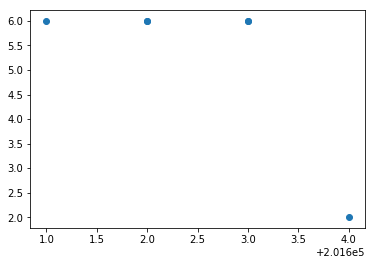

In [66]:
plt.scatter(temp.timestamp, temp.type_encoded)

In [22]:
all_who_have_churned = len(churned_ids)

In [23]:
temp=pd.get_dummies(churn_df[['adv_change_type']], drop_first=False)

In [24]:
churn_df=pd.concat([churn_df, temp], axis=1, sort=False)

In [25]:
# How many of the churned advertisers had an Idle Down status? (2 methods)
#churn_df[churn_df.adv_change_type=='Idle Down']['idadvertiser'].nunique()

churn_df.groupby(by=['idadvertiser']).agg({'adv_change_type_Idle Down': 'max'}).sum()

adv_change_type_Idle Down    742
dtype: int64

In [26]:
# How many of the churned advertisers had an Idle Up status? (2 methods)
# churn_df[churn_df.adv_change_type=='Idle Up']['idadvertiser'].nunique()

churn_df.groupby(by=['idadvertiser']).agg({'adv_change_type_Idle Up': 'max'}).sum()

adv_change_type_Idle Up    923
dtype: int64

In [27]:
# How many of the churned advertisers had an Change Up status?
# churn_df[churn_df.adv_change_type=='Change Up']['idadvertiser'].nunique()

churn_df.groupby(by=['idadvertiser']).agg({'adv_change_type_Change Up': 'max'}).sum()

adv_change_type_Change Up    1758
dtype: int64

In [28]:
# How many of the churned advertisers had an Change Down status?
# churn_df[churn_df.adv_change_type=='Change Down']['idadvertiser'].nunique()

churn_df.groupby(by=['idadvertiser']).agg({'adv_change_type_Change Down': 'max'}).sum()

2069

In [71]:
# How many of the churned advertisers had an Idle Down and Idle Up status?
churn_df[(churn_df.adv_change_type=='Idle Down') | (churn_df.adv_change_type=='Idle UP')]['idadvertiser'].nunique()

742

In [41]:
# How many of the churned advertisers had an Change Up and Change Down status?
temp=churn_df.groupby(by=['idadvertiser'], as_index=False).agg({'adv_change_type_Change Down': 'max', 
                                           'adv_change_type_Change Up': 'max'})
temp[(temp.iloc[:,1]==1) & (temp.iloc[:,2]==1)].shape[0]

1145

In [42]:
# How many of the churned advertisers had an Change Down and Idle Down status?
temp=churn_df.groupby(by=['idadvertiser'], as_index=False).agg({'adv_change_type_Change Down': 'max', 
                                           'adv_change_type_Idle Down': 'max'})
temp[(temp.iloc[:,1]==1) & (temp.iloc[:,2]==1)].shape[0]

222

In [43]:
# How many of the churned advertisers had an Change Down and Idle Up status?
temp=churn_df.groupby(by=['idadvertiser'], as_index=False).agg({'adv_change_type_Change Down': 'max', 
                                           'adv_change_type_Idle Up': 'max'})
temp[(temp.iloc[:,1]==1) & (temp.iloc[:,2]==1)].shape[0]

254

In [44]:
all_who_have_churned

7963

In [59]:
# Check out the geographic locaions of the churned

temp=churn_df.groupby(by=['idadvertiser','advertiser_state'], as_index=False).count()
temp.drop(temp.iloc[:,2:], axis=1, inplace=True)
state_counts=temp.advertiser_state.value_counts()

In [60]:
# Check out the business of the churned

temp=churn_df.groupby(by=['idadvertiser','business_category'], as_index=False).count()
temp.drop(temp.iloc[:,2:], axis=1, inplace=True)
temp.business_category.value_counts().sum()

# Looks like the business category of some adv_ids is not unique

8171

In [61]:
# Check out the business subcategory of the churned

temp=churn_df.groupby(by=['idadvertiser','business_subcategory'], as_index=False).count()
temp.drop(temp.iloc[:,2:], axis=1, inplace=True)
temp.business_subcategory.value_counts().sum()

# Looks like the business subcategory of some adv_ids is not unique

8773

# * ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *

In [98]:
## Checking groupby functionality

df[df.idadvertiser==3281][['idadvertiser','idcampaign','csr_year', 'csr_month', 'spend']] \
.groupby(by=['idadvertiser','csr_year','csr_month'], as_index=False) \
.aggregate({'spend':'sum'}, as_index=False)

,idadvertiser,csr_year,csr_month,spend
0,3281,2016,1,893.85
1,3281,2016,2,767.49
2,3281,2016,3,369.72
3,3281,2016,4,986.82


In [111]:
# Get all the churned instances and look into amount spent each month.

sub_df=df[df.idadvertiser.isin(churned_ids)].groupby(by=['idadvertiser','csr_year','csr_month'], as_index=False) \
.aggregate({'spend':'sum'}, as_index=False)

In [112]:
sub_df.head()

,idadvertiser,csr_year,csr_month,spend
0,369,2016,3,101.34
1,369,2016,4,18.66
2,2146,2016,1,749.53
3,2146,2016,2,797.86
4,2146,2016,3,644.91


In [113]:
sub_df.shape

(66242, 4)

In [64]:
#sub_df.idcampaign_master.nunique()

In [114]:
sub_df.idadvertiser.nunique()

7963

In [ ]:
sub_df['timestamp']=sub_df.csr_year*100+sub_df.csr_month

sub_df.sort_values(by=['idadvertiser','timestamp'], inplace=True)

In [127]:
sub_df.head(15)

,idadvertiser,csr_year,csr_month,spend,timestamp
0,369,2016,3,101.34,201603
1,369,2016,4,18.66,201604
2,2146,2016,1,749.53,201601
3,2146,2016,2,797.86,201602
4,2146,2016,3,644.91,201603
5,2146,2016,4,1198.17,201604
6,2146,2016,5,1470.06,201605
7,2146,2016,6,679.02,201606
8,2146,2016,7,1306.01,201607
9,2146,2016,8,1291.61,201608


In [131]:
sub_df.groupby(by=['idadvertiser'], as_index=False).agg({'csr_year':'min', 'csr_year':'max'}, as_index=False).head()

,idadvertiser,csr_year
0,369,2016
1,2146,2017
2,2295,2017
3,2467,2016
4,3281,2016


### ----------------------------------

In [54]:
df[(df['adv_change_type']=='Churn') & (df['idcampaign_master']==2140758)][['adv_change_type', 'advertiser_state']]

,adv_change_type,advertiser_state
555133,Churn,FL
555134,Churn,FL
555135,Churn,FL
555136,Churn,FL


In [8]:
# bundle based on state
state_counts=df.groupby(['idcampaign_master','advertiser_state']).count().index.get_level_values(level=1).value_counts()

# bundle based on business category
bc_counts=df.groupby(['idcampaign_master','business_category']).count().index.get_level_values(level=1).value_counts()

# bundle based on business subcategory
bsc_counts=df.groupby(['idcampaign_master','business_subcategory']).count().index.get_level_values(level=1).value_counts()

In [9]:
temp=df[['idcampaign_master','campaign_budget']].sort_values(by=['idcampaign_master'])['idcampaign_master'].value_counts()

In [125]:
#temp=df_s[['idcampaign_master','campaign_budget']].sort_values(by=['idcampaign_master'])

In [129]:
temp[temp==5][0:5]

2460156    5
2287723    5
2463130    5
1920788    5
1899908    5
Name: idcampaign_master, dtype: int64

In [10]:
temp=df[['idcampaign_master','campaign_budget']].sort_values(by=['idcampaign_master'])

In [11]:
temp[temp.idcampaign_master==2460156]

,idcampaign_master,campaign_budget
758996,2460156,99.0
761567,2460156,99.0
758997,2460156,99.0
761568,2460156,99.0
761569,2460156,99.0


### It looks like campaigns within the same campaign_master_id all have the same budget!